## Data Analysis

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib
sns.set_theme(style="ticks")
matplotlib.rcParams["figure.dpi"] = 300
%matplotlib qt

df = pd.read_csv('iris_2D.csv')
sns.pairplot(df, hue="Label")

## Decision Tree for Classification

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
# load data
data = pd.read_csv('iris_2D.csv')

# get x
x_data = data[['Petal_Length', 'Petal_Width']].to_numpy()
x_data = x_data.reshape(6, 2)
print(x_data)

[[1.  0.2]
 [1.3 0.6]
 [0.9 0.7]
 [1.7 0.5]
 [1.8 0.9]
 [1.2 1.3]]


In [3]:
y_train = np.array([0, 0, 0, 1, 1, 1]) 
print(y_train)

[0 0 0 1 1 1]


#### Decision Tree Classifier

In [4]:
# Defining an object for DTC and fitting for whole dataset
dt_classifier = DecisionTreeClassifier(max_depth=3, 
                                       #min_samples_leaf=10, 
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(x_data, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

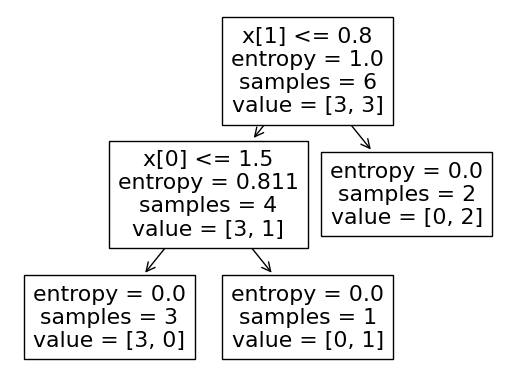

In [5]:
from sklearn import tree

tree.plot_tree(dt_classifier)
plt.show()

In [6]:
text_representation = tree.export_text(dt_classifier)
print(text_representation)

|--- feature_1 <= 0.80
|   |--- feature_0 <= 1.50
|   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- class: 1
|--- feature_1 >  0.80
|   |--- class: 1



In [10]:
import dtreeviz
%config InlineBackend.figure_format = 'svg'
#%matplotlib qt

viz_model = dtreeviz.model(dt_classifier,
                           X_train=x_data, y_train=y_train,
                           feature_names=['Petal_Length', 'Petal_Width'],
                           target_name='Label')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
v.save("iris.svg")  # optionally save as svg

In [51]:
import matplotlib
sns.set_theme(style="ticks")
matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams['savefig.dpi'] = 500
%matplotlib qt

dt_classifier = DecisionTreeClassifier(max_depth=1,
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(x_data, y_train)
viz_model = dtreeviz.model(dt_classifier,
                           X_train=x_data, y_train=y_train,
                           feature_names=['Petal_Length', 'Petal_Width'],
                           target_name='Label')

viz_model.ctree_feature_space(show={'splits','title'}, 
                              features=['Petal_Width'],
                              figsize=(5,4))

In [40]:
viz_model.ctree_feature_space(nbins=40, 
                              gtype='barstacked', 
                              show={'splits','title'}, 
                              features=['Petal_Width'],
                              figsize=(8,4))

In [20]:
viz_model.ctree_feature_space(nbins=40, 
                              gtype='barstacked', 
                              show={'splits','title'}, 
                              features=['Petal_Length'],
                              figsize=(8,3))

In [54]:
dt_classifier = DecisionTreeClassifier(max_depth=1,
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(x_data, y_train)
viz_model = dtreeviz.model(dt_classifier,
                           X_train=x_data, y_train=y_train,
                           feature_names=['Petal_Length', 'Petal_Width'],
                           target_name='Label')

viz_model.ctree_feature_space(show={'splits','title'}, 
                              features=['Petal_Length', 'Petal_Width'])

In [80]:
%config InlineBackend.figure_format = 'svg'
from dtreeviz import decision_boundaries

dt_classifier = DecisionTreeClassifier(max_depth=2,
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(x_data, y_train)

fig,axes = plt.subplots(1,2, figsize=(8, 4.2), dpi=300)
decision_boundaries(dt_classifier, x_data, y_train, ax=axes[0],
       feature_names=['Height', 'Width'])
decision_boundaries(dt_classifier, x_data, y_train, ax=axes[1],
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['Height', 'Width'])
plt.show()

In [100]:
fig,ax = plt.subplots(1,1, figsize=(10,8))
decision_boundaries(dt_classifier, x_data, y_train, ax=ax,
       ntiles=20,
       tile_fraction=1.0, # make continuous, no white borders between tiles
       markers=['o','X'], # use different markers
       feature_names=['Height', 'Width'],
       colors={'scatter_marker_alpha':1})
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 1 features as input.

In [106]:
# overfitting - noise
X, y =  data['Petal_Length'], data['Label']
dt_classifier = DecisionTreeClassifier(max_depth=3,
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(X.values.reshape(-1,1), y)

decision_boundaries(dt_classifier, X, y,
                    feature_names=['Petal_Length'], 
                    target_name='Label', 
                    figsize=(8,4))
plt.tight_layout()

In [103]:
viz_model = dtreeviz.model(dt_classifier,
                           X_train=X.values.reshape(-1,1), y_train=np.array([0, 0, 0, 1, 1, 1]),
                           feature_names=['Petal_Length'],
                           target_name='Label')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
v.save("iris.svg")  # optionally save as svg

In [113]:
data

,Petal_Length,Petal_Width,Label
0,1.0,0.2,0.0
1,1.3,0.6,0.0
2,0.9,0.7,0.0
3,1.7,0.5,1.0
4,1.8,0.9,1.0
5,1.2,1.3,1.0


In [121]:
x = data[['Petal_Length']].iloc[0]
x['Petal_Length'] = 1.5
x

Petal_Length    1.5
Name: 0, dtype: float64

In [122]:
viz_model = dtreeviz.model(dt_classifier,
                           X_train=X.values.reshape(-1,1), y_train=np.array([0, 0, 0, 1, 1, 1]),
                           feature_names=['Petal_Length'],
                           target_name='Label')

v = viz_model.view(x=x)
v.show()                 # pop up window
v.save("iris.svg")

In [107]:
X.values.reshape(-1,1).shape

(6, 1)

In [120]:
dt_classifier.predict(np.array([[0.8]]))

array([0.])